# Variational Autoencoder

## Resources

- [Lecture: Variational Inference](https://www.youtube.com/watch?v=UTMpM4orS30)
- [Auto-Encoding Variational Bayes](https://arxiv.org/pdf/1312.6114.pdf)
- [An Introduction to Variational Autoencoders](https://arxiv.org/pdf/1906.02691.pdf)
- [Understanding Variational Autoencoders (VAEs) from two perspectives: deep learning and graphical models](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/)

## Information Theory

### Self-information
Claude Shannon's definition of self-information was chosen to meet several axioms:

- An event with probability 100% is perfectly unsurprising and yields no information.
- The less probable an event is, the more surprising it is and the more information it yields.
- If two independent events are measured separately, the total amount of information is the sum of the self-informations of the individual events.

It can be shown that there is a unique function of probability that meets these three axioms, up to a multiplicative scaling factor. Broadly given an event $x$ with probability $P$, the information content is defined as follows: $I(x) = -\log p(x)$

Formally, given a random variable $X$ with probability mass function $p$, the self-information of measuring X as outcome $x$ is defined as: $I_X(x) = -\log p(x)$

### Entropy
The Shannon entropy of the random variable X is defined as:
$$H(X) = \mathbb{E}(I_X(X)) = -\sum_x p(x)\log p(x)$$

or for a distribution $p$:
$$H(p) = -\sum_x p(x)\log p(x)$$

### Cross entropy
The cross-entropy of the distribution $p$ relative to a distribution $q$ is defined as:
$$H_p(q) = -\mathbb{E}_{q}(\log p(x)) = -\sum_x q(x) \log p(x)$$

### Kullback-Leibler divergence
The Kullback-Leibler divergence is defined as:
$$D_p(q) = H_p(q) - H(q) = -\sum_x q(x) \log \frac{p(x)}{q(x)}$$

## Variational bound
Let us consider some dataset $X = {x^{(i)}}_{i=1}^N$ consisting of $N$ i.i.d samples of some continuous or discrete variable $x$. We assume that the data are generated by some random process, involving an unobserved continuous random variable $z$. The process consists of two steps: (1) a value $z^{(i)}$ is generated from some prior distribution $p_{\theta^*}(z)$; (2) a value $x^{(i)}$ is generated from some conditional distribution $p_{\theta^*}(x|z)$. We assume that the prior $p_{\theta^*}(z)$ and likelihood $p_{\theta^*}(x|z)$ come from parametric families of distributions $p_{\theta}(z)$ and $p_{\theta}(x|z)$, and that their PDFs are differentiable almost everywhere w.r.t both $\theta$ and $z$. Unfortunately, a lot of this process is hidden from our view: the true parameters $\theta^*$ as well as the values of the latent variables $z^{(i)}$ are unknown to us.

$
\begin{align}
D_{p_{\theta}(z|x^{(i)})}(q_{\phi}(z|x^{(i)})) & = -\mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log \frac{p_{\theta}(z|x^{(i)})}{q_{\phi}(z|x^{(i)})}) = \mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log \frac{q_{\phi}(z|x^{(i)}) p_{\theta}(x^{(i)})}{p_{\theta}(x^{(i)}|z) p_{\theta}(z)}) = \mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log \frac{q_{\phi}(z|x^{(i)}) p_{\theta}(x^{(i)})}{p_{\theta}(x^{(i)}, z)}) \\
& = -\mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log p_{\theta}(x^{(i)}, z)) - H(q_{\phi}(z|x^{(i)})) + \log p_{\theta}(x^{(i)}) \\
\log p_{\theta}(x^{(i)}) & = D_{p_{\theta}(z|x^{(i)})}(q_{\phi}(z|x^{(i)})) + \mathcal{L}(\theta, \phi; x^{(i)})
\end{align}
$

Since the KL-divergence is non-negative,

$
\begin{align}
\log p_{\theta}(x^{(i)}) \geq \mathcal{L}(\theta, \phi; x^{(i)}) & = \mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log p_{\theta}(x^{(i)}, z)) + H(q_{\phi}(z|x^{(i)})) \\
& = \mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log p_{\theta}(x^{(i)} | z)) + \mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log p_{\theta}(z)) + H(q_{\phi}(z|x^{(i)})) \\
& = \mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log p_{\theta}(x^{(i)} | z)) - [H_{p_{\theta}(z)}(q_{\phi}(z|x^{(i)})) - H(q_{\phi}(z|x^{(i)}))] \\
& = \mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log p_{\theta}(x^{(i)} | z)) - D_{p_{\theta}(z)}(q_{\phi}(z|x^{(i)}))
\end{align}
$

The first term is the reconstruction loss, or expected negative log-likelihood of the $i$-th datapoint. The expectation is taken with respect to the encoder’s distribution over the representations. This term encourages the decoder to learn to reconstruct the data. If the decoder’s output does not reconstruct the data well, statistically we say that the decoder parameterizes a likelihood distribution that does not place much probability mass on the true data. For example, if our goal is to model black and white images and our model places high probability on there being black spots where there are actually white spots, this will yield the worst possible reconstruction. Poor reconstruction will incur a large cost in this loss function.

The second term is a regularizer that we throw in. This is the Kullback-Leibler divergence between the encoder’s distribution $q_{\phi}(z|x^{(i)})$ and $p_{\theta}(z)$. This divergence measures how much information is lost when using $q$ to represent $p$. It is one measure of how close $q$ is to $p$.

By approximating the expectation by a single sample we get:

$
\begin{align}
\mathcal{L}(\theta, \phi; x^{(i)}) & = \mathbb{E}_{q_{\phi}(z|x^{(i)})}(\log p_{\theta}(x^{(i)} | z)) - D_{p_{\theta}(z)}(q_{\phi}(z|x^{(i)})) \\
& \approx \log p_{\theta}(x^{(i)} | z) - D_{p_{\theta}(z)}(q_{\phi}(z|x^{(i)}))
\end{align}
$

Everything in this loss expression has a closed form for Gaussians, and can be used for training.

## Load data

In [10]:
import numpy as np

import torch
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [17]:
transform = transforms.Compose([transforms.Resize(32),
                                transforms.CenterCrop(32),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(root="data/", transform=transform)

batch_size = 32
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

## Visualize data

/tmp/ipykernel_44292/1752164580.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])


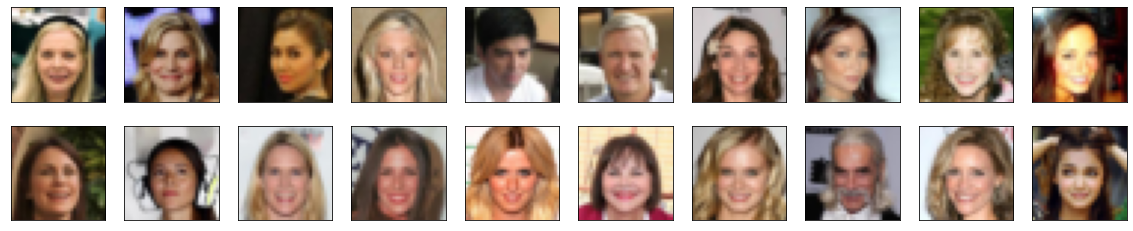

In [18]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# obtain one batch of training images
dataiter = iter(dataloader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

## VAE definition

In [61]:
img_size = 32
capacity = 64
latent_dims = 16
learning_rate = 0.001
n_epochs = 1
variational_beta = 1

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=capacity, kernel_size=3, stride=2, padding=1) # out: c x 14 x 14
        self.conv2 = nn.Conv2d(in_channels=capacity, out_channels=capacity*2, kernel_size=3, stride=2, padding=1) # out: c x 7 x 7
        self.fc_mu = nn.Linear(in_features=capacity*2*8*8, out_features=latent_dims)
        self.fc_logvar = nn.Linear(in_features=capacity*2*8*8, out_features=latent_dims)
            
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1) # flatten batch of multi-channel feature maps to a batch of feature vectors
        x_mu = self.fc_mu(x)
        x_logvar = self.fc_logvar(x)
        return x_mu, x_logvar

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc = nn.Linear(in_features=latent_dims, out_features=capacity*2*8*8)
        self.deconv2 = nn.ConvTranspose2d(in_channels=capacity*2, out_channels=capacity, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.deconv1 = nn.ConvTranspose2d(in_channels=capacity, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1)
            
    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), capacity*2, 8, 8) # unflatten batch of feature vectors to a batch of multi-channel feature maps
        x = F.relu(self.deconv2(x))
        x = torch.sigmoid(self.deconv1(x)) # last layer before output is sigmoid, since we are using BCE as reconstruction loss
        return x
    
class VariationalAutoencoder(nn.Module):
    def __init__(self):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def forward(self, x):
        latent_mu, latent_logvar = self.encoder(x)
        latent = self.latent_sample(latent_mu, latent_logvar)
        x_recon = self.decoder(latent)
        return x_recon, latent_mu, latent_logvar
    
    def latent_sample(self, mu, logvar):
        if self.training:
            # the reparameterization trick
            std = logvar.mul(0.5).exp_()
            eps = torch.empty_like(std).normal_()
            return eps.mul(std).add_(mu)
        else:
            return mu
    
def vae_loss(recon_x, x, mu, logvar):
    # recon_x is the probability of a multivariate Bernoulli distribution p.
    # -log(p(x)) is then the pixel-wise binary cross-entropy.
    # Averaging or not averaging the binary cross-entropy over all pixels here
    # is a subtle detail with big effect on training, since it changes the weight
    # we need to pick for the other loss term by several orders of magnitude.
    # Not averaging is the direct implementation of the negative log likelihood,
    # but averaging makes the weight of the other loss term independent of the image resolution.
    recon_loss = F.binary_cross_entropy(recon_x.view(-1, img_size*img_size), x.view(-1, img_size*img_size), reduction='sum')
    
    # KL-divergence between the prior distribution over latent vectors
    # (the one we are going to sample from when generating new images)
    # and the distribution estimated by the generator for the given image.
    kldivergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    return recon_loss + variational_beta * kldivergence
    
    
vae = VariationalAutoencoder()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vae = vae.to(device)

num_params = sum(p.numel() for p in vae.parameters() if p.requires_grad)
print('Number of parameters: %d' % num_params)

Number of parameters: 552611


## Train VAE

In [58]:
optimizer = torch.optim.Adam(params=vae.parameters(), lr=learning_rate, weight_decay=1e-5)

# set to training mode
vae.train()

train_loss_avg = []

for epoch in range(n_epochs):
    train_loss_avg.append(0)
    num_batches = 0
    
    for image_batch, _ in dataloader:
        
        image_batch = image_batch.to(device)

        # vae reconstruction
        image_batch_recon, latent_mu, latent_logvar = vae(image_batch)
        
        # reconstruction error
        loss = vae_loss(image_batch_recon, image_batch, latent_mu, latent_logvar)
        
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        # one step of the optmizer (using the gradients from backpropagation)
        optimizer.step()
        
        train_loss_avg[-1] += loss.item()
        num_batches += 1
        
    train_loss_avg[-1] /= num_batches
    print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, num_epochs, train_loss_avg[-1]))

KeyboardInterrupt: 

## Visualize reconstruction

Original images


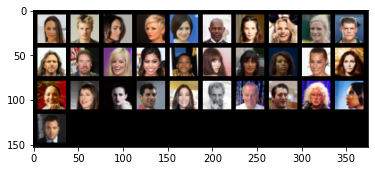

VAE reconstruction:


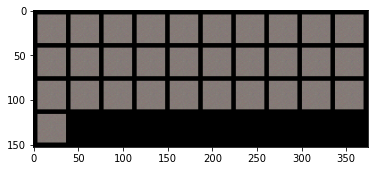

In [62]:
plt.ion()

import torchvision.utils

vae.eval()

# This function takes as an input the images to reconstruct
# and the name of the model with which the reconstructions
# are performed
def to_img(x):
    x = x.clamp(0, 1)
    return x

def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualise_output(images, model):

    with torch.no_grad():
    
        images = images.to(device)
        images, _, _ = model(images)
        images = images.cpu()
        images = to_img(images)
        np_imagegrid = torchvision.utils.make_grid(images[1:50], 10, 5).numpy()
        plt.imshow(np.transpose(np_imagegrid, (1, 2, 0)))
        plt.show()

images, labels = iter(dataloader).next()

# First visualise the original images
print('Original images')
show_image(torchvision.utils.make_grid(images[1:50],10,5))
plt.show()

# Reconstruct and visualise the images using the vae
print('VAE reconstruction:')
visualise_output(images, vae)